In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import os
os.environ["CUDA_VISIBLE_DEVICES"] = "0"

In [3]:
import torch
print(torch.cuda.is_available()) # True
print(torch.cuda.device_count()) # 1
print(torch.cuda.current_device()) # 0
print(torch.cuda.device(0)) # <torch.cuda.device at 0x7efce0b03be0>
print(torch.cuda.get_device_name(0)) # 'GeForce GTX 950M'

True
1
0
NVIDIA TITAN Xp


In [4]:
import sys
sys.path.append("../../..")

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [6]:
from librep.datasets.har.loaders import (
    KuHar_BalancedView20HzMotionSenseEquivalent
)

2022-11-29 09:07:38.015660: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2022-11-29 09:07:39.556336: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; dlerror: libnvinfer.so.7: cannot open shared object file: No such file or directory
2022-11-29 09:07:39.556468: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer_plugin.so.7'; dlerror: libnvinfer_plugin.so.7: cannot open shared object file: No such file or directory
2022-11-29 09:07:39.556484: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Cannot dlopen some TensorRT libraries. If you would like t

In [7]:
from librep.transforms.topo_ae import (
    TopologicalDimensionalityReduction,
    CustomTopoDimRedTransform
)
from librep.transforms import UMAP
from sklearn.manifold import TSNE
from experiments.Topological_ae.Experiment_utils import *
from librep.datasets.multimodal import TransformMultiModalDataset
from librep.transforms.fft import FFT

In [8]:
loader = KuHar_BalancedView20HzMotionSenseEquivalent(
    root_dir="../../../data/views/KuHar/balanced_20Hz_motionsense_equivalent-v1", 
    download=False
)

In [9]:
# Load the dataset
train_val, test = loader.load(concat_train_validation=True, label=loader.standard_label)
train_val, test

(PandasMultiModalDataset: samples=3114, features=360, no. window=6, label_columns='standard activity code',
 PandasMultiModalDataset: samples=246, features=360, no. window=6, label_columns='standard activity code')

In [10]:
train_HD = np.array(train_val[:][0])
train_LD = None
train_Y = np.array(train_val[:][1])
test_HD = np.array(test[:][0])
test_LD = None
test_Y = np.array(test[:][1])

In [11]:
print(train_HD.shape, train_Y.shape, test_HD.shape, test_Y.shape)

(3114, 360) (3114,) (246, 360) (246,)


# Aplicar FFT

In [12]:
fft_transform = FFT(centered = True)
transformer = TransformMultiModalDataset(
    transforms=[fft_transform],
    new_window_name_prefix="fft."
)

In [13]:
train_dataset_fft = transformer(train_val)
test_dataset_fft = transformer(test)

In [14]:
print(train_dataset_fft.X.shape)
print(test_dataset_fft.X.shape)

(3114, 180)
(246, 180)


In [15]:
print(np.max(train_dataset_fft.X))

1199.4899017510002


In [16]:
train_HD = train_dataset_fft.X
train_LD = None
train_Y = train_dataset_fft.y
test_HD = test_dataset_fft.X
test_LD = None
test_Y = test_dataset_fft.y

In [17]:
print(train_HD.shape, train_Y.shape, test_HD.shape, test_Y.shape)

(3114, 180) (3114,) (246, 180) (246,)


Topologically Regularized ConvolutionalAutoencoder_custom_dim3
Using python to compute signatures
ConvAECustomDim, Input: (1, 180) Inner dim: 10
ENCODER STRUCT torch.Size([4, 8, 5])


/home/darlinne.soto/librep-hiaac/experiments/Topological_ae/KuHar20Hz/../../../librep/transforms/topo_ae.py:75: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  in_tensor = torch.tensor(reshaped_data, device=cuda0).float()
/home/darlinne.soto/librep-hiaac/experiments/Topological_ae/KuHar20Hz/../../../librep/transforms/topo_ae.py:87: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  in_tensor = torch.tensor(reshaped_data, device=cuda0).float()


Epoch:1, P:None, Loss:434.6562, Loss-ae:434.6562, Loss-topo:250.7965
Epoch:2, P:None, Loss:370.5938, Loss-ae:370.5938, Loss-topo:387.5334
Epoch:3, P:None, Loss:349.8095, Loss-ae:349.8095, Loss-topo:649.0442
Epoch:4, P:None, Loss:296.6425, Loss-ae:296.6425, Loss-topo:1118.1541
Epoch:5, P:None, Loss:259.8282, Loss-ae:259.8282, Loss-topo:2356.1023
Epoch:6, P:None, Loss:231.1972, Loss-ae:231.1972, Loss-topo:3458.6264
Epoch:7, P:None, Loss:215.8836, Loss-ae:215.8836, Loss-topo:4109.7708
Epoch:8, P:None, Loss:204.8173, Loss-ae:204.8173, Loss-topo:5364.7472
Epoch:9, P:None, Loss:188.8961, Loss-ae:188.8961, Loss-topo:6314.7769
Epoch:10, P:None, Loss:177.3903, Loss-ae:177.3903, Loss-topo:8030.3796
Epoch:11, P:None, Loss:166.8451, Loss-ae:166.8451, Loss-topo:8828.1498
Epoch:12, P:None, Loss:154.3461, Loss-ae:154.3461, Loss-topo:11711.4861
Epoch:13, P:None, Loss:143.7857, Loss-ae:143.7857, Loss-topo:12025.2811
Epoch:14, P:None, Loss:135.1489, Loss-ae:135.1489, Loss-topo:15320.9227
Epoch:15, P:Non

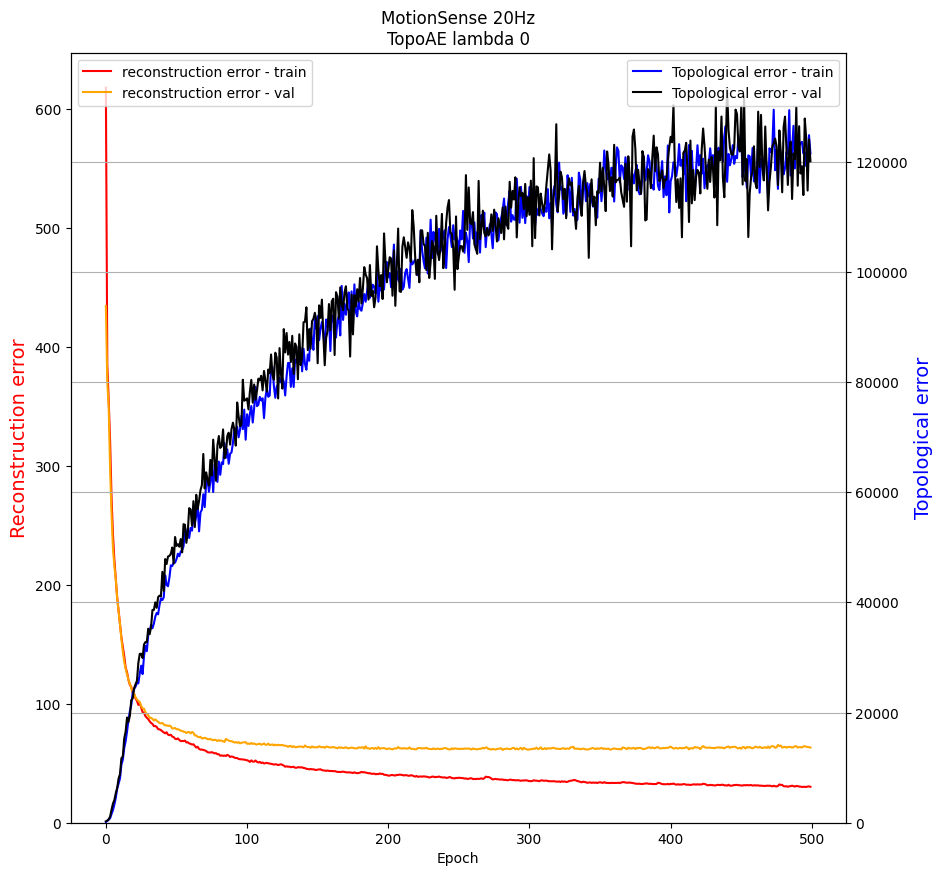

Topologically Regularized ConvolutionalAutoencoder_custom_dim3
Using python to compute signatures
ConvAECustomDim, Input: (1, 180) Inner dim: 10
ENCODER STRUCT torch.Size([4, 8, 5])


/home/darlinne.soto/librep-hiaac/experiments/Topological_ae/KuHar20Hz/../../../librep/transforms/topo_ae.py:75: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  in_tensor = torch.tensor(reshaped_data, device=cuda0).float()
/home/darlinne.soto/librep-hiaac/experiments/Topological_ae/KuHar20Hz/../../../librep/transforms/topo_ae.py:87: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  in_tensor = torch.tensor(reshaped_data, device=cuda0).float()


Epoch:1, P:None, Loss:823.9083, Loss-ae:823.9069, Loss-topo:0.0132
Epoch:2, P:None, Loss:815.6347, Loss-ae:815.6346, Loss-topo:0.0005
Epoch:3, P:None, Loss:806.9932, Loss-ae:806.9932, Loss-topo:0.0005
Epoch:4, P:None, Loss:821.1321, Loss-ae:821.1320, Loss-topo:0.0008
Epoch:5, P:None, Loss:817.6834, Loss-ae:817.6834, Loss-topo:0.0006
Epoch:6, P:None, Loss:811.1385, Loss-ae:811.1384, Loss-topo:0.0004
Epoch:7, P:None, Loss:819.2651, Loss-ae:819.2651, Loss-topo:0.0003
Epoch:8, P:None, Loss:811.9485, Loss-ae:811.9485, Loss-topo:0.0005
Epoch:9, P:None, Loss:814.0021, Loss-ae:814.0021, Loss-topo:0.0004
Epoch:10, P:None, Loss:815.4866, Loss-ae:815.4865, Loss-topo:0.0005
Epoch:11, P:None, Loss:806.8938, Loss-ae:806.8937, Loss-topo:0.0007
Epoch:12, P:None, Loss:822.9978, Loss-ae:822.9978, Loss-topo:0.0003
Epoch:13, P:None, Loss:818.1506, Loss-ae:818.1506, Loss-topo:0.0005
Epoch:14, P:None, Loss:809.8825, Loss-ae:809.8824, Loss-topo:0.0004
Epoch:15, P:None, Loss:806.9628, Loss-ae:806.9627, Loss-t

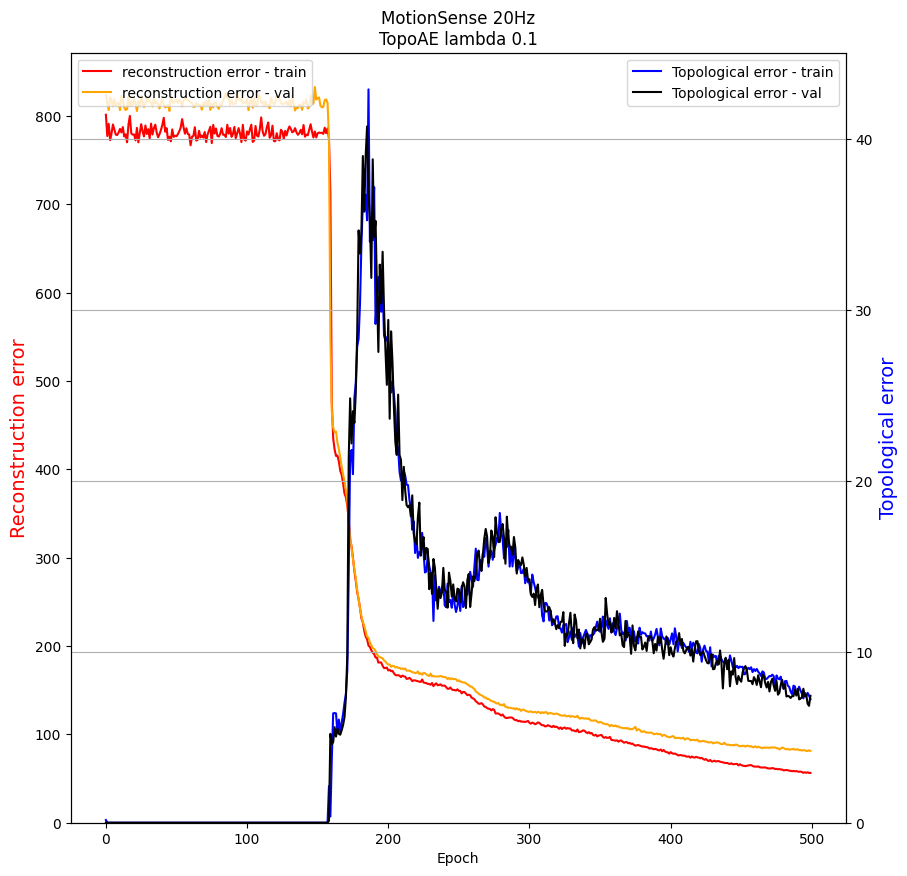

Topologically Regularized ConvolutionalAutoencoder_custom_dim3
Using python to compute signatures
ConvAECustomDim, Input: (1, 180) Inner dim: 10
ENCODER STRUCT torch.Size([4, 8, 5])


/home/darlinne.soto/librep-hiaac/experiments/Topological_ae/KuHar20Hz/../../../librep/transforms/topo_ae.py:75: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  in_tensor = torch.tensor(reshaped_data, device=cuda0).float()
/home/darlinne.soto/librep-hiaac/experiments/Topological_ae/KuHar20Hz/../../../librep/transforms/topo_ae.py:87: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  in_tensor = torch.tensor(reshaped_data, device=cuda0).float()


Epoch:1, P:None, Loss:491.4918, Loss-ae:491.0137, Loss-topo:47.8129
Epoch:2, P:None, Loss:404.5036, Loss-ae:403.7386, Loss-topo:76.4940
Epoch:3, P:None, Loss:336.9029, Loss-ae:335.0030, Loss-topo:189.9905
Epoch:4, P:None, Loss:277.4013, Loss-ae:273.8997, Loss-topo:350.1671
Epoch:5, P:None, Loss:251.1607, Loss-ae:246.4765, Loss-topo:468.4113
Epoch:6, P:None, Loss:228.7049, Loss-ae:223.6046, Loss-topo:510.0274
Epoch:7, P:None, Loss:210.7238, Loss-ae:204.4549, Loss-topo:626.8839
Epoch:8, P:None, Loss:200.6656, Loss-ae:194.1067, Loss-topo:655.8971
Epoch:9, P:None, Loss:188.2029, Loss-ae:181.8246, Loss-topo:637.8344
Epoch:10, P:None, Loss:177.6653, Loss-ae:171.0314, Loss-topo:663.3924
Epoch:11, P:None, Loss:169.9191, Loss-ae:163.1369, Loss-topo:678.2201
Epoch:12, P:None, Loss:158.5307, Loss-ae:151.9428, Loss-topo:658.7854
Epoch:13, P:None, Loss:149.9288, Loss-ae:142.5670, Loss-topo:736.1770
Epoch:14, P:None, Loss:141.2826, Loss-ae:133.6130, Loss-topo:766.9599
Epoch:15, P:None, Loss:133.7527

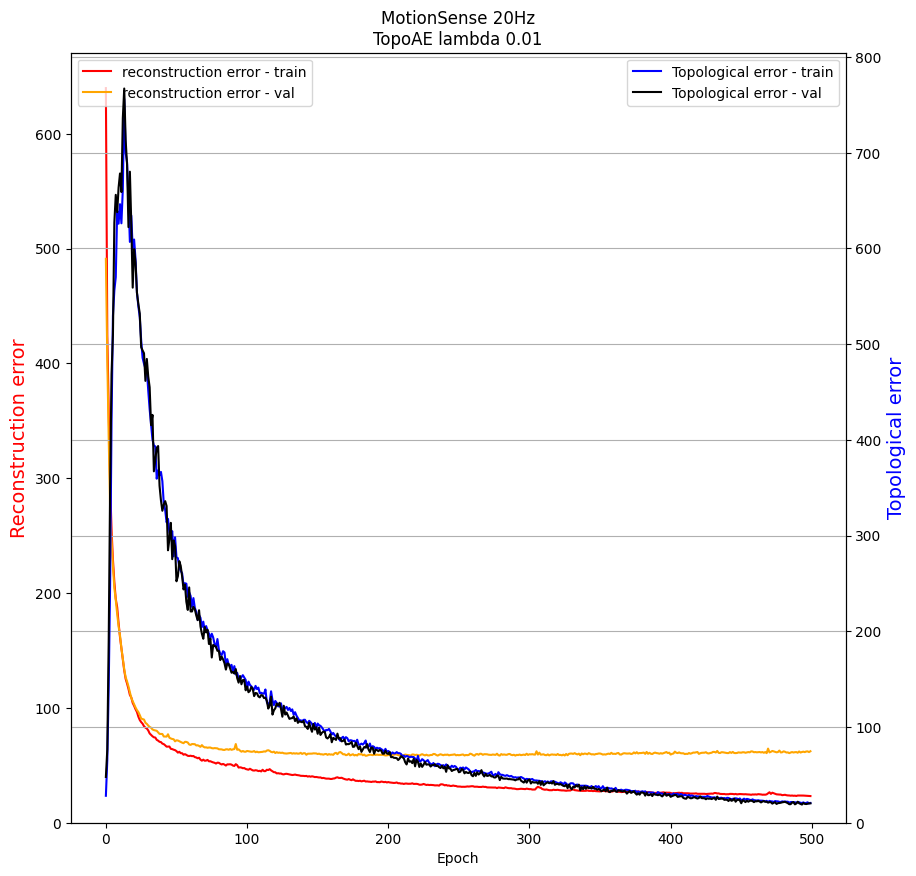

Topologically Regularized ConvolutionalAutoencoder_custom_dim3
Using python to compute signatures
ConvAECustomDim, Input: (1, 180) Inner dim: 10
ENCODER STRUCT torch.Size([4, 8, 5])


/home/darlinne.soto/librep-hiaac/experiments/Topological_ae/KuHar20Hz/../../../librep/transforms/topo_ae.py:75: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  in_tensor = torch.tensor(reshaped_data, device=cuda0).float()
/home/darlinne.soto/librep-hiaac/experiments/Topological_ae/KuHar20Hz/../../../librep/transforms/topo_ae.py:87: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  in_tensor = torch.tensor(reshaped_data, device=cuda0).float()


Epoch:1, P:None, Loss:516.6667, Loss-ae:483.1100, Loss-topo:33.5567
Epoch:2, P:None, Loss:434.8070, Loss-ae:423.5414, Loss-topo:11.2656
Epoch:3, P:None, Loss:401.9715, Loss-ae:390.0900, Loss-topo:11.8815
Epoch:4, P:None, Loss:384.4198, Loss-ae:374.8956, Loss-topo:9.5242
Epoch:5, P:None, Loss:375.2281, Loss-ae:365.1300, Loss-topo:10.0981
Epoch:6, P:None, Loss:359.6334, Loss-ae:349.1541, Loss-topo:10.4793
Epoch:7, P:None, Loss:344.9940, Loss-ae:329.4177, Loss-topo:15.5763
Epoch:8, P:None, Loss:321.9659, Loss-ae:305.5182, Loss-topo:16.4477
Epoch:9, P:None, Loss:292.6851, Loss-ae:280.3565, Loss-topo:12.3285
Epoch:10, P:None, Loss:282.3732, Loss-ae:269.1879, Loss-topo:13.1853
Epoch:11, P:None, Loss:272.4042, Loss-ae:260.0454, Loss-topo:12.3588
Epoch:12, P:None, Loss:262.6959, Loss-ae:251.0520, Loss-topo:11.6440
Epoch:13, P:None, Loss:253.3007, Loss-ae:243.3935, Loss-topo:9.9072
Epoch:14, P:None, Loss:244.9458, Loss-ae:234.3247, Loss-topo:10.6211
Epoch:15, P:None, Loss:238.8187, Loss-ae:229.

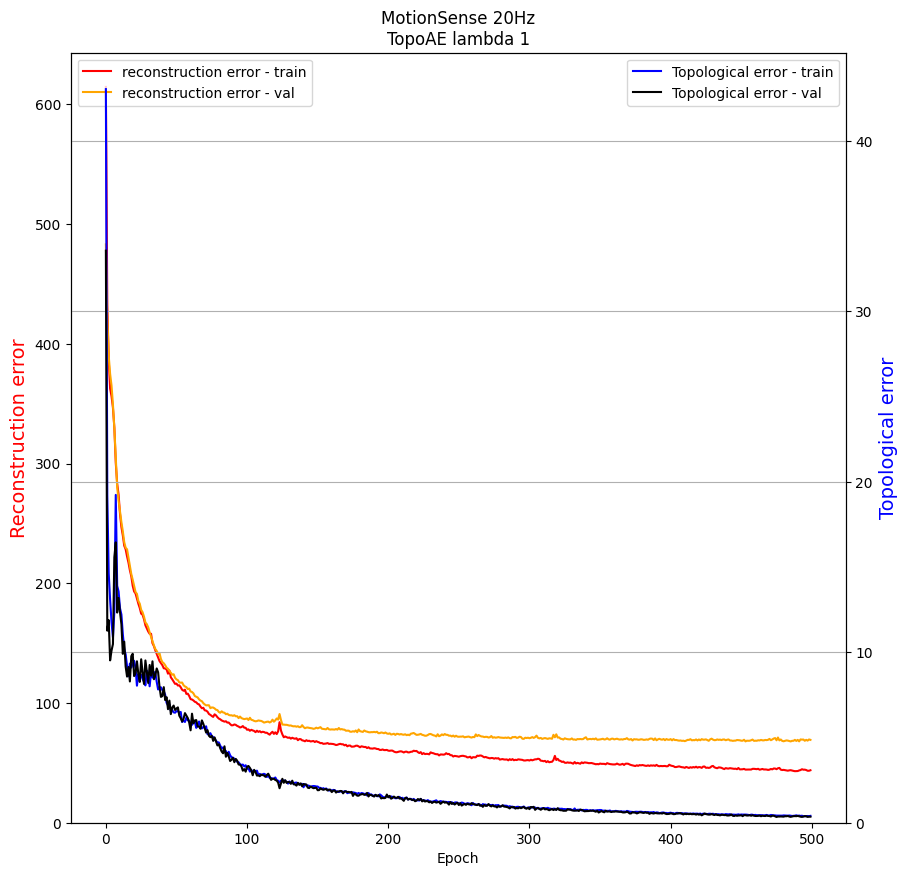

Topologically Regularized ConvolutionalAutoencoder_custom_dim3
Using python to compute signatures
ConvAECustomDim, Input: (1, 180) Inner dim: 10
ENCODER STRUCT torch.Size([4, 8, 5])


/home/darlinne.soto/librep-hiaac/experiments/Topological_ae/KuHar20Hz/../../../librep/transforms/topo_ae.py:75: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  in_tensor = torch.tensor(reshaped_data, device=cuda0).float()
/home/darlinne.soto/librep-hiaac/experiments/Topological_ae/KuHar20Hz/../../../librep/transforms/topo_ae.py:87: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  in_tensor = torch.tensor(reshaped_data, device=cuda0).float()


Epoch:1, P:None, Loss:814.9689, Loss-ae:814.9571, Loss-topo:0.0012
Epoch:2, P:None, Loss:815.2168, Loss-ae:815.2092, Loss-topo:0.0008
Epoch:3, P:None, Loss:820.0070, Loss-ae:819.9960, Loss-topo:0.0011
Epoch:4, P:None, Loss:818.7759, Loss-ae:818.7712, Loss-topo:0.0005
Epoch:5, P:None, Loss:820.4257, Loss-ae:820.4219, Loss-topo:0.0004
Epoch:6, P:None, Loss:809.4677, Loss-ae:809.4624, Loss-topo:0.0005
Epoch:7, P:None, Loss:812.1011, Loss-ae:812.0948, Loss-topo:0.0006
Epoch:8, P:None, Loss:813.8457, Loss-ae:813.8417, Loss-topo:0.0004
Epoch:9, P:None, Loss:816.3992, Loss-ae:816.3939, Loss-topo:0.0005
Epoch:10, P:None, Loss:811.8070, Loss-ae:811.7997, Loss-topo:0.0007
Epoch:11, P:None, Loss:817.4478, Loss-ae:817.4453, Loss-topo:0.0003
Epoch:12, P:None, Loss:815.1397, Loss-ae:815.1361, Loss-topo:0.0004
Epoch:13, P:None, Loss:813.9466, Loss-ae:813.9422, Loss-topo:0.0004
Epoch:14, P:None, Loss:817.3605, Loss-ae:817.3552, Loss-topo:0.0005
Epoch:15, P:None, Loss:815.7002, Loss-ae:815.6949, Loss-t

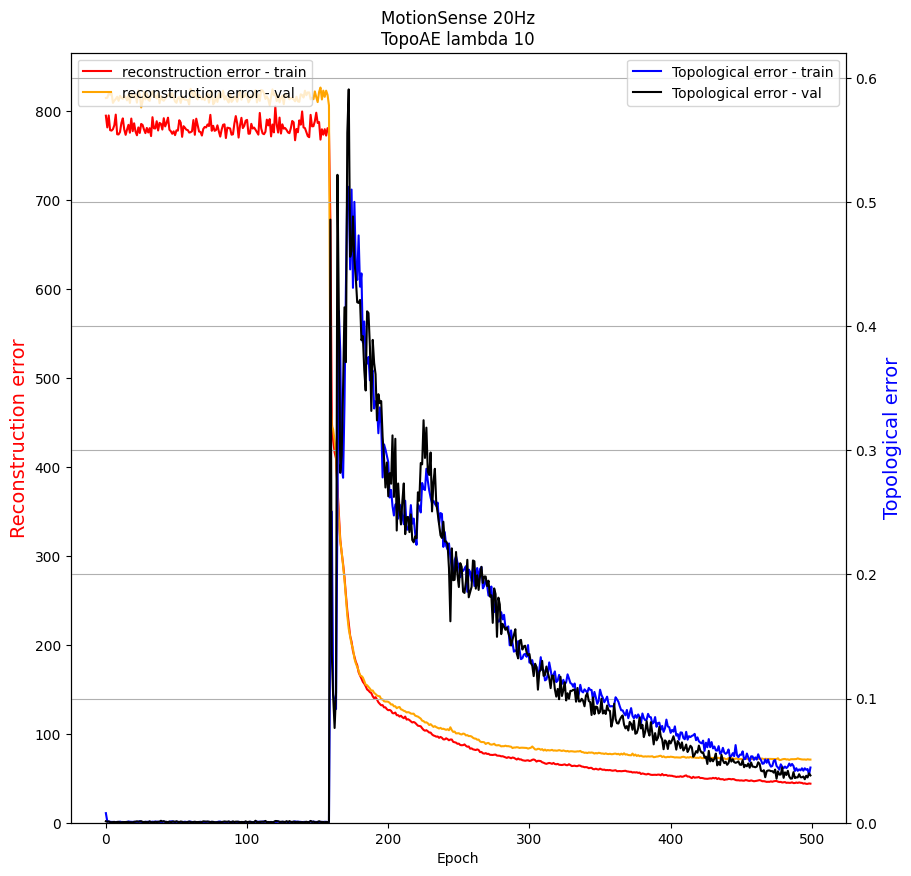

Topologically Regularized ConvolutionalAutoencoder_custom_dim3
Using python to compute signatures
ConvAECustomDim, Input: (1, 180) Inner dim: 10
ENCODER STRUCT torch.Size([4, 8, 5])


/home/darlinne.soto/librep-hiaac/experiments/Topological_ae/KuHar20Hz/../../../librep/transforms/topo_ae.py:75: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  in_tensor = torch.tensor(reshaped_data, device=cuda0).float()
/home/darlinne.soto/librep-hiaac/experiments/Topological_ae/KuHar20Hz/../../../librep/transforms/topo_ae.py:87: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  in_tensor = torch.tensor(reshaped_data, device=cuda0).float()


Epoch:1, P:None, Loss:839.9217, Loss-ae:813.1491, Loss-topo:0.2677
Epoch:2, P:None, Loss:723.8397, Loss-ae:707.9166, Loss-topo:0.1592
Epoch:3, P:None, Loss:478.9886, Loss-ae:463.4217, Loss-topo:0.1557
Epoch:4, P:None, Loss:434.3708, Loss-ae:422.1449, Loss-topo:0.1223
Epoch:5, P:None, Loss:402.4927, Loss-ae:390.0995, Loss-topo:0.1239
Epoch:6, P:None, Loss:386.8069, Loss-ae:376.4770, Loss-topo:0.1033
Epoch:7, P:None, Loss:370.3627, Loss-ae:359.0221, Loss-topo:0.1134
Epoch:8, P:None, Loss:362.4815, Loss-ae:354.1857, Loss-topo:0.0830
Epoch:9, P:None, Loss:354.7267, Loss-ae:347.3359, Loss-topo:0.0739
Epoch:10, P:None, Loss:344.2726, Loss-ae:337.0919, Loss-topo:0.0718
Epoch:11, P:None, Loss:331.4053, Loss-ae:322.8676, Loss-topo:0.0854
Epoch:12, P:None, Loss:319.4668, Loss-ae:308.8136, Loss-topo:0.1065
Epoch:13, P:None, Loss:303.6852, Loss-ae:289.8712, Loss-topo:0.1381
Epoch:14, P:None, Loss:292.3889, Loss-ae:279.2997, Loss-topo:0.1309
Epoch:15, P:None, Loss:281.9618, Loss-ae:271.1197, Loss-t

KeyboardInterrupt: 

In [18]:
import pickle

# Variables to reuse
save_id = 0
model_name = 'ConvolutionalAutoencoder_custom_dim3'
model_dim = 10
model_epc = 500
model_lams = [0, 0.1, 0.01, 1, 10, 100, 1000]

for model_lam in model_lams:
    # Training model
    topo_reducer = CustomTopoDimRedTransform(
        model_name=model_name,
        model_lambda=model_lam,
        patience=None,
        num_epochs=model_epc,
        from_dim=180,
        to_dim=model_dim
    )

    title_plot = "MotionSense 20Hz\nTopoAE lambda {}".format(model_lam)
    topo_reducer.fit(train_HD, train_Y, title_plot=title_plot)

    # Variables to reuse
    filename = 'data/{}_{}_{}_{}_{}.pkl'.format(model_name, model_lam, model_dim, model_epc, save_id)

    filehandler = open(filename, 'wb')
    pickle.dump(topo_reducer, filehandler)
    filehandler.close()